<a href="https://colab.research.google.com/github/tejascworks/DIP_basics/blob/main/digitalimageprocessing_basics_works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#to perform histogram equalization on an image and display the original and equalized histograms.

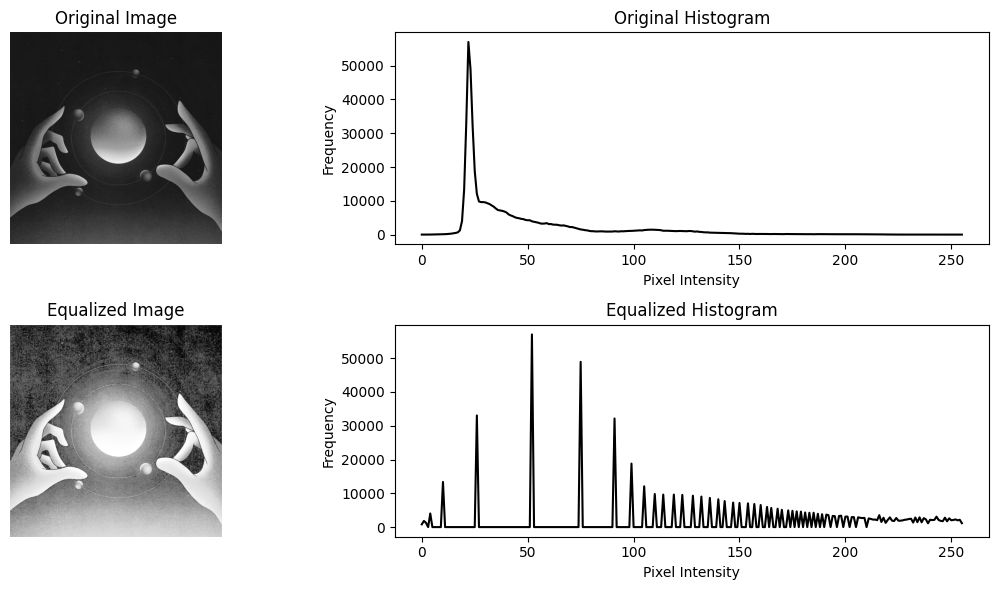

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Compute histograms
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot the original image and histogram
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(original_hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Plot the equalized image and histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(equalized_hist, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#to compute and display Piecewise–linear transformation functions on an image

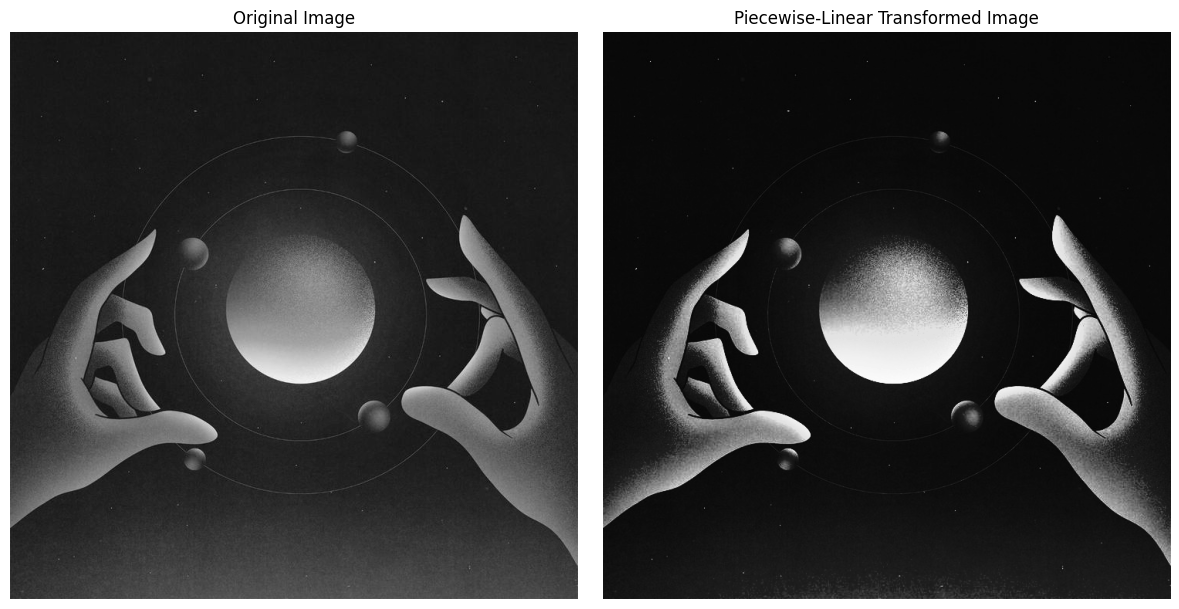

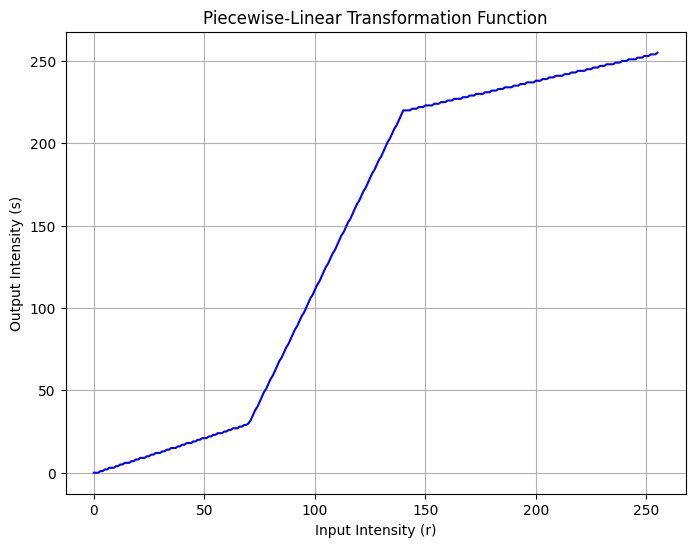

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform piecewise-linear transformation
def piecewise_linear_transform(image, r1, s1, r2, s2):
    """
    Apply a piecewise-linear transformation to the input image.
    Args:
        image: Input grayscale image.
        r1, s1: First control point.
        r2, s2: Second control point.
    Returns:
        Transformed image.
    """
    # Create a lookup table for transformation
    lookup_table = np.zeros(256, dtype=np.uint8)
    for r in range(256):
        if r < r1:
            lookup_table[r] = (s1 / r1) * r
        elif r < r2:
            lookup_table[r] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
        else:
            lookup_table[r] = ((255 - s2) / (255 - r2)) * (r - r2) + s2

    # Apply the transformation using the lookup table
    transformed_image = cv2.LUT(image, lookup_table)
    return transformed_image

# Load the image in grayscale
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Define control points for piecewise-linear transformation
r1, s1 = 70, 30  # First control point
r2, s2 = 140, 220  # Second control point

# Perform piecewise-linear transformation
transformed_image = piecewise_linear_transform(image, r1, s1, r2, s2)

# Plot the original and transformed images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Piecewise-Linear Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the transformation function
x = np.arange(0, 256)
y = np.piecewise(x, [x < r1, (x >= r1) & (x <= r2), x > r2],
                 [lambda x: (s1 / r1) * x,
                  lambda x: ((s2 - s1) / (r2 - r1)) * (x - r1) + s1,
                  lambda x: ((255 - s2) / (255 - r2)) * (x - r2) + s2])

plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue')
plt.title('Piecewise-Linear Transformation Function')
plt.xlabel('Input Intensity (r)')
plt.ylabel('Output Intensity (s)')
plt.grid()
plt.show()


#to implement image sampling and quantization for a grayscale image

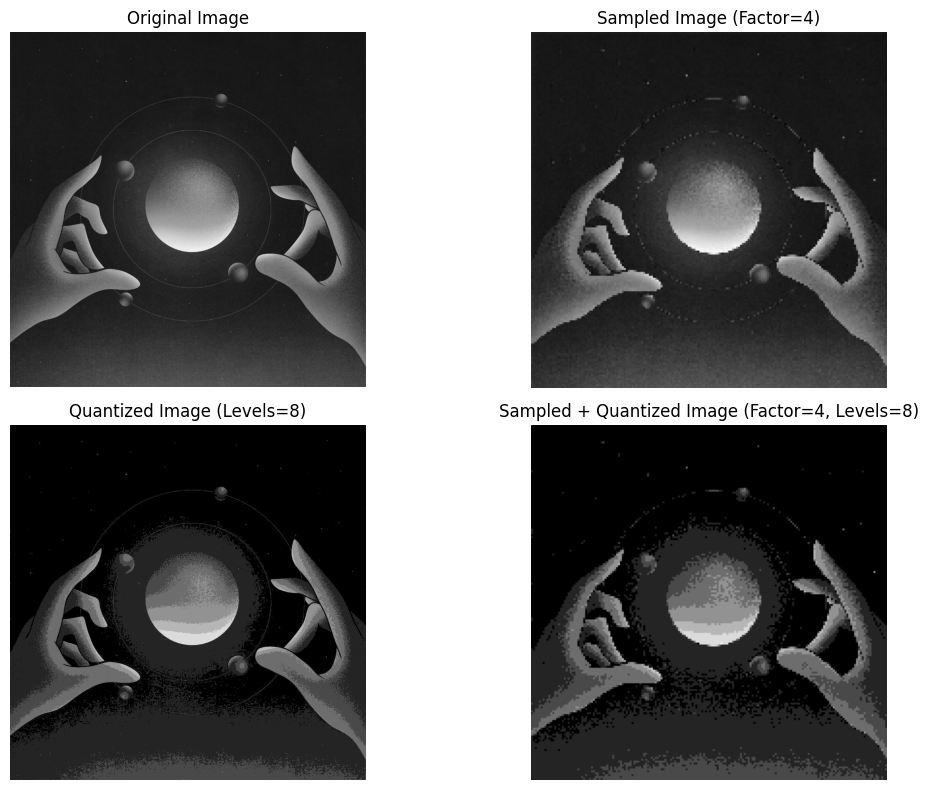

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sample_image(image, factor):
    """
    Perform image sampling by reducing resolution.
    Args:
        image: Input grayscale image.
        factor: Sampling factor (e.g., 2, 4, etc.).
    Returns:
        Downsampled image.
    """
    # Downsample by factor
    sampled = image[::factor, ::factor]
    return sampled

def quantize_image(image, levels):
    """
    Perform image quantization by reducing intensity levels.
    Args:
        image: Input grayscale image.
        levels: Number of intensity levels (e.g., 2, 4, 8, etc.).
    Returns:
        Quantized image.
    """
    # Scale the image to the desired number of levels
    step = 256 // levels
    quantized = (image // step) * step
    return quantized

# Load the image in grayscale
image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# Define sampling factor and quantization levels
sampling_factor = 4  # Reduce resolution by a factor of 4
quantization_levels = 8  # Reduce intensity levels to 8

# Perform sampling and quantization
sampled_image = sample_image(image, sampling_factor)
quantized_image = quantize_image(image, quantization_levels)

# Plot the original, sampled, and quantized images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sampled image
plt.subplot(2, 2, 2)
plt.imshow(sampled_image, cmap='gray')
plt.title(f'Sampled Image (Factor={sampling_factor})')
plt.axis('off')

# Quantized image
plt.subplot(2, 2, 3)
plt.imshow(quantized_image, cmap='gray')
plt.title(f'Quantized Image (Levels={quantization_levels})')
plt.axis('off')

# Combined Sampling + Quantization
sampled_quantized_image = quantize_image(sampled_image, quantization_levels)
plt.subplot(2, 2, 4)
plt.imshow(sampled_quantized_image, cmap='gray')
plt.title(f'Sampled + Quantized Image (Factor={sampling_factor}, Levels={quantization_levels})')
plt.axis('off')

plt.tight_layout()
plt.show()


#Implement Image negative, Log and Power-Law transformation in DIP on Medical imaging or Industrial Imaging

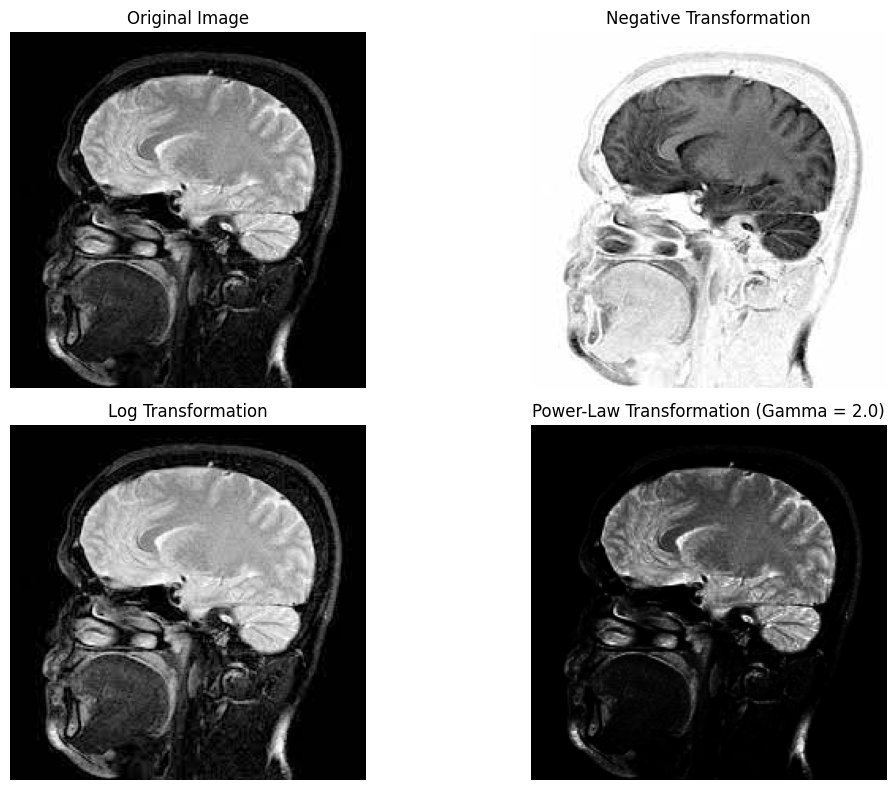

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('med.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image file

# Normalize the image to the range [0, 1]
image_normalized = image / 255.0

# Image Negative Transformation
negative_image = 1 - image_normalized

# Log Transformation
c = 1  # Scaling constant
log_image = c * np.log1p(image_normalized)  # log1p = log(1 + x) to avoid log(0)

# Power-Law Transformation (Gamma Correction)
gamma = 2.0  # Adjust gamma as needed (e.g., 0.5, 1.5)
power_image = c * (image_normalized ** gamma)

# Scale back to range [0, 255] for display
negative_image_display = (negative_image * 255).astype(np.uint8)
log_image_display = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
power_image_display = (power_image * 255).astype(np.uint8)

# Plot the results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Negative Image
plt.subplot(2, 2, 2)
plt.imshow(negative_image_display, cmap='gray')
plt.title('Negative Transformation')
plt.axis('off')

# Log Transformation
plt.subplot(2, 2, 3)
plt.imshow(log_image_display, cmap='gray')
plt.title('Log Transformation')
plt.axis('off')

# Power-Law Transformation
plt.subplot(2, 2, 4)
plt.imshow(power_image_display, cmap='gray')
plt.title(f'Power-Law Transformation (Gamma = {gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()
